In [1]:
from scipy import optimize
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

In [47]:
def curve(x, a, b, c, d):
  return (a * np.cos(b*x+c)+d)

def convertToDate(dayNumArr):
  strt_date = datetime(2022, 1, 1, 0, 0)
  dateList = []
  dateList2 = []
  for each in dayNumArr:
    res_date = strt_date + timedelta(days=int(each) - 1, hours = 0 , minutes=0)
    dateList.append(res_date)
  return dateList

def addTimeToDateTime(dateData, timeData):
  dateTimeList = []
  counter = 0
  for each in timeData:
    hourMinSplit = each.split(":")
    hour = hourMinSplit[0]
    min  = hourMinSplit[1]
    dateTimeList.append(dateData[counter] + timedelta(hours=int(hour), minutes=int(min)))
    counter += 1
  return dateTimeList

/Users/arthurdvorkin/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


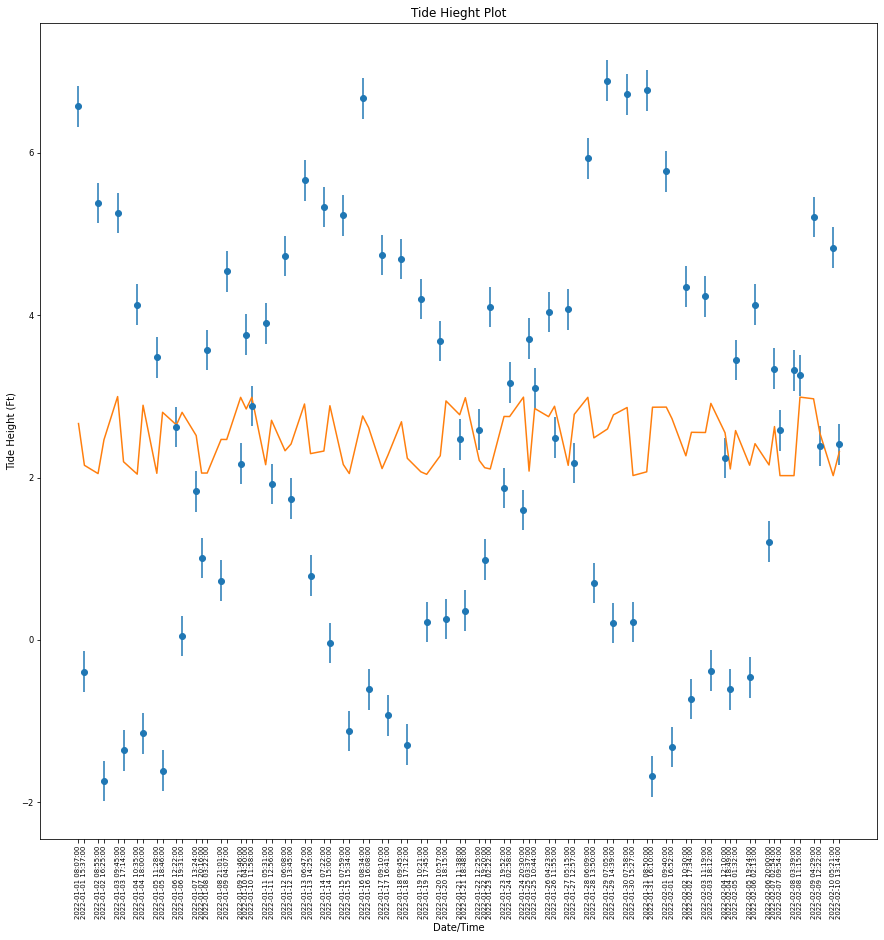

In [48]:
from numpy.lib import npyio
import matplotlib.dates as mdates
import pandas as pd
Strdata = np.loadtxt("ASTR19_S22_group_project_data.txt", dtype="str")
year = "2022"
  
y_err = 0.25

dateData = convertToDate(Strdata[:,0])

dateTimeData = addTimeToDateTime(dateData, Strdata[:,1])
TimeStamp = np.array([each.timestamp() for each in dateTimeData])
xPlotData = np.array([str(each) for each in dateData])

tideArr = Strdata[:,2].astype(float)

yError = np.full(len(tideArr), 0.25)


pramaters, covariance = optimize.curve_fit(curve,TimeStamp,tideArr,sigma=yError)
yFit = pramaters[0] * np.sin(pramaters[1]*TimeStamp+pramaters[2])+pramaters[3]

fig = plt.figure(figsize=(15,15))
plt.xticks(TimeStamp, dateTimeData, rotation='vertical')

plt.title("Tide Hieght Plot")
plt.xlabel("Date/Time")
plt.ylabel("Tide Height (Ft)")

plt.errorbar(TimeStamp, tideArr, yerr=yError, fmt='o', label="data")
plt.plot(TimeStamp,yFit, label='fit')

plt.savefig("TideBestFit.pdf", bbox_inches="tight")


To generate this plot I did following steps:
1) import txt file using numpy
2) Get date times from firt two cols
3) Generate a fit with scipy with function y=a*sin(bx+c)+d 
4) Plot data

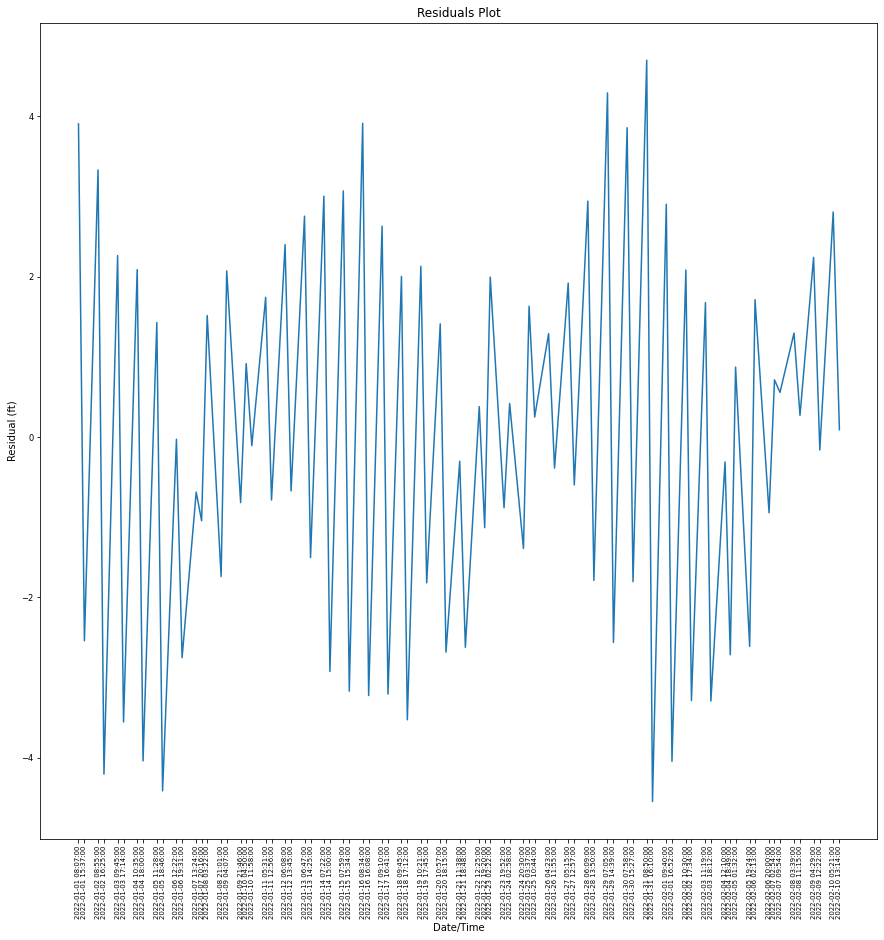

In [43]:
from numpy.random.mtrand import poisson
residuals = tideArr- yFit 
plt.figure(figsize=(15,15))
plt.title("Residuals Plot")
plt.xlabel("Date/Time")
plt.ylabel("Residual (ft)")

plt.xticks(TimeStamp, dateTimeData, rotation='vertical')

plt.plot(TimeStamp, residuals)
plt.savefig("ResidualsPlot.pdf", bbox_inches="tight")



Scatter(Standard Deviation) of Residualss: 2.402671766294541
Median of Residuals: 0.030859328580946865
Mean of Residuals: -0.0168087142663944


Scatter(Standard Deviation) of Tide Hieght: 2.38064082624931
Median of Tide Hieght: 2.585
Mean of Tide Hieght: 2.4782926829268295


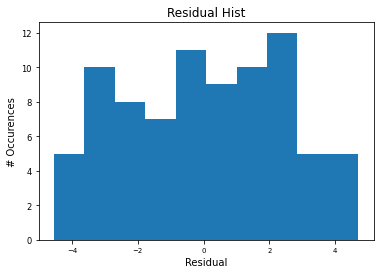

In [44]:
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='small')

plt.hist(residuals,bins=10)
plt.title("Residual Hist")
plt.xlabel("Residual")
plt.ylabel("# Occurences")
plt.savefig("ResidualHistogram.pdf", bbox_inches="tight")

stdRes = np.std(residuals)
medianRes = np.median(residuals)
meanRes = np.mean(residuals)
print(f"Scatter(Standard Deviation) of Residualss: {stdRes}")
print(f"Median of Residuals: {medianRes}")
print(f"Mean of Residuals: {meanRes}\n\n")

stdTide = np.std(tideArr)
medianTide = np.median(tideArr)
meanTide = np.mean(tideArr)
print(f"Scatter(Standard Deviation) of Tide Hieght: {stdTide}")
print(f"Median of Tide Hieght: {medianTide}")
print(f"Mean of Tide Hieght: {meanTide}")



In [11]:
print(f"Mean of all tides: {np.mean(tideArr)}")
print(f"Standard Deviation of all tides: {np.std(tideArr)}")
#deviation = tideArr[26] - (np.mean(tideArr) + np.std(tideArr))
tideArr2 = np.delete(tideArr,26)
print(f"Mean of normal tides(all tides excluding first high tide on Jan 14) {np.mean(tideArr2)}")

print(f"Standard Deviation of normal tides(all tides excluding first high tide on Jan 14): {np.std(tideArr2)}")
deviation =  np.std(tideArr) - np.std(tideArr2)
print(f"Deviation in standard deviation between all tides and normal tides only: {deviation}")
deviationFromNormMean = tideArr[26] - np.mean(tideArr2)
print(f"Deviation of Jan 14 tsuami tide from mean of normal tides only: {deviationFromNormMean}")
deviation = deviationFromNormMean - np.std(tideArr2)

print(f"\n\nDeviation of Jan 14 tsuami tide from standard deviation of normal tides only: {deviation}")
print(f"Therefore, we can conclude that this tsuami casued the tide height to deviate around 0.5ft from the normal tide")




Mean of all tides: 2.4782926829268295
Standard Deviation of all tides: 2.38064082624931
Mean of normal tides(all tides excluding first high tide on Jan 14) 2.4430864197530866
Standard Deviation of normal tides(all tides excluding first high tide on Jan 14): 2.3739801667321907
Deviation in standard deviation between all tides and normal tides only: 0.0066606595171192495
Deviation of Jan 14 tsuami tide from mean of normal tides only: 2.8869135802469135


Deviation of Jan 14 tsuami tide from standard deviation of normal tides only: 0.5129334135147228
Therefore, we can conclude that this tsuami casued the tide height to deviate around 0.5ft from the normal tide


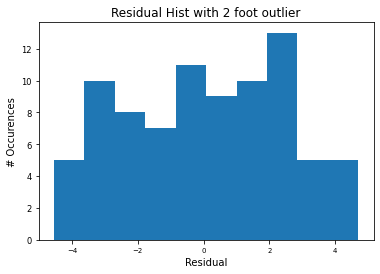

In [31]:
residuals2 = np.append(residuals, 2)
plt.hist(residuals2,bins=10)
plt.title("Residual Hist with 2 foot outlier")
plt.xlabel("Residual")
plt.ylabel("# Occurences")
plt.savefig("ResidualHistogram.pdf", bbox_inches="tight")
plt.savefig("ResidualHistogramWith2FootOutlier.pdf", bbox_inches="tight")

